# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [10]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [11]:
# load dataset
df=pd.read_csv("loan_prediction.csv")
# shape of df
df.shape





(614, 13)

In [12]:
assert df.shape == (614, 13)

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [14]:
# your code here
df.drop("Loan_ID", axis=1, inplace= True)



df['Loan_Status']=df['Loan_Status'].astype('category').cat.codes
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [15]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [16]:
stats=pd.DataFrame({'colomn names':[],'type':[], '#null':[],'#unique':[],'unique values':[]})
stats.set_index(['colomn names'])

def coun(col):
    result=''
    if(df[col].nunique() >= 10):
        return str(df.get_value(1,col,takeable=False))+'-'+str(df.get_value(2,col,takeable=False))+'-'+str(df.get_value(3,col,takeable=False))+'-...'
    else:
        k=df[col].unique()
        for element in k:
            result = result+'-'+str(element)

        return result[1:]

for col in df:
    stats=stats.append({'colomn names':col,'type':df[col].dtype,'#null':df[col].isnull().sum(),'#unique':df[col].nunique(),'unique values':coun(col)},ignore_index=True)

stats.drop([0,1,2,3,4,5,6])

,colomn names,type,#null,#unique,unique values
7,LoanAmount,float64,22.0,203.0,128.0-66.0-120.0-...
8,Loan_Amount_Term,float64,14.0,10.0,360.0-360.0-360.0-...
9,Credit_History,float64,50.0,2.0,1.0-0.0-nan
10,Property_Area,object,0.0,3.0,Urban-Rural-Semiurban
11,Loan_Status,int8,0.0,2.0,1-0


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [18]:
df['Married'].fillna(df['Married'].mode(), inplace=True)
print(df.shape)
df=df.dropna()

(614, 12)


In [19]:
assert df.isnull().sum().sum() == 0
df.shape

(480, 12)

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

             status  percentage
Loan_Status                    
0               148       30.83
1               332       69.17


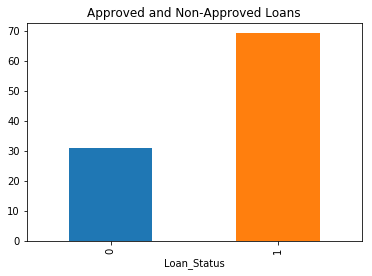

In [20]:
# your code here
#ax = df.plot.bar(x='Loan_Status', y='val', rot=0)
df_loan=pd.DataFrame()
total=df['Loan_Status'].count()
df_loan['status']=df.groupby('Loan_Status').size()
df_loan['percentage'] = round(df_loan['status']/total*100,2)
print(df_loan)
df_loan['percentage'].plot(kind="bar", title="Approved and Non-Approved Loans")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [21]:
# your code here
print ('Number of Approved Loans:'+ str(df[df['Loan_Status'] == 1].shape[0]))
print ('Number of not Approved Loans:'+ str(df[df['Loan_Status'] == 0].shape[0]))


Number of Approved Loans:332
Number of not Approved Loans:148


In [22]:
# your answer here
Number of Approved Loans:332
Number of not Approved Loans:148


SyntaxError: invalid syntax (<ipython-input-22-59f84269b356>, line 2)

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [23]:
def make_bar_plot(df, column):
    (df.groupby(column).size()/df.shape[0]).plot(kind="barh",title="Approval rate per "+str(column))

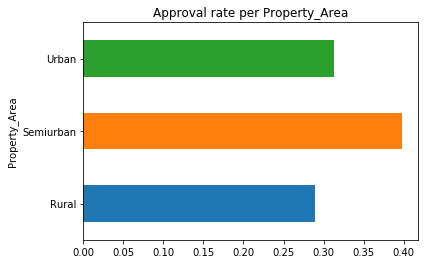

In [24]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [25]:
def make_box_plot(df, column):  
    # your code here
    boxplot = df.boxplot(column=column, by=['Loan_Status'])

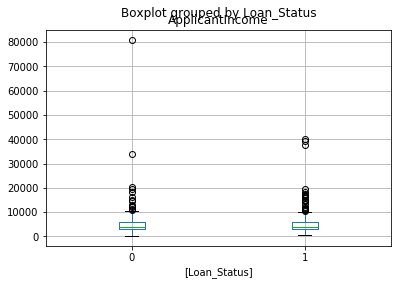

In [26]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

In [27]:
for col in # your code here:
    print(f'****************** {col} *******************')
    # your code here

SyntaxError: invalid syntax (<ipython-input-27-166fbef22f2e>, line 1)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [28]:
# your code here
s=['Property_Area','Dependents']
df_new1=pd.get_dummies(df['Property_Area'])
df_new2=pd.get_dummies(df['Dependents'])
df=df.drop(['Property_Area'],axis=1)
df=df.drop(['Dependents'],axis=1)

df=pd.concat([df, df_new1], axis=1)
df=pd.concat([df, df_new2], axis=1)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0
6,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,1,0,0,1,1,0,0,0
7,Male,Yes,Graduate,No,3036,2504.0,158.0,360.0,0.0,0,0,1,0,0,0,0,1
8,Male,Yes,Graduate,No,4006,1526.0,168.0,360.0,1.0,1,0,0,1,0,0,1,0
9,Male,Yes,Graduate,No,12841,10968.0,349.0,360.0,1.0,0,0,1,0,0,1,0,0
10,Male,Yes,Graduate,No,3200,700.0,70.0,360.0,1.0,1,0,0,1,0,0,1,0


print the head of df

In [29]:
# your code here
df.head()
df.shape

(480, 17)

In [30]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [31]:
# your code here
for col in df:
    if df[col].dtype == 'object':  
        df[col] = pd.Categorical(df[col]).codes 

Print the head of df

In [32]:
# your code here
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [33]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [34]:
y=pd.DataFrame({'column':df['Loan_Status']})

temp=df.copy()
X=temp.drop("Loan_Status", axis= 1, inplace = False)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Rural', 'Semiurban', 'Urban', '0', '1', '2', '3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [35]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=123)
print ("train shape", len(X_train),len(y_train))
print ("test shape", len(X_test),len(y_test))

train shape 336 336
test shape 144 144


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [36]:
# your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8035714285714286
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [37]:
# your code here
from sklearn import metrics
y_pred = clf.predict(X_test)  
print (metrics.confusion_matrix(y_test, y_pred))
l=metrics.confusion_matrix(y_test, y_pred)
print (metrics.classification_report(y_test, y_pred))



[[22 25]
 [ 4 93]]
              precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.79      0.96      0.87        97

   micro avg       0.80      0.80      0.80       144
   macro avg       0.82      0.71      0.73       144
weighted avg       0.81      0.80      0.78       144



In [38]:

precision_0 = l[0][0]/(l[0][0]+l[1][0])
recall_1 =l[0][0]/(l[0][0]+l[0][1])
print ('precision_0 =',precision_0)
print('recall_1 =',recall_1)

precision_0 = 0.8461538461538461
recall_1 = 0.46808510638297873


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [41]:
# evaluate the model using 5-fold cross-validation
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
o=list(df)
scores = cross_val_score(clf, X, y, df["Loan_Status"], scoring='f1', cv=5)
print (scores)
print ('scores mean =', scores.mean(), 'scores std =', scores)

[0.87417219 0.86092715 0.8590604  0.91428571 0.85915493]
scores mean = 0.8735200768592174 scores std = [0.87417219 0.86092715 0.8590604  0.91428571 0.85915493]


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.